# Consumer Complaint Resolution Analysis Using Python

In [1]:
#Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, Sklearn for model building and performance visualization, andbased on the best model,make a prediction for the test file and save the output.The mainobjective is to predict whetherour customer is disputedor not with the help ofgiven data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the Data from the Given excel file.
from google.colab import files
uploaded = files.upload()


Saving Consumer_Complaints_test.csv to Consumer_Complaints_test.csv
Saving Consumer_Complaints_train.csv to Consumer_Complaints_train.csv


In [4]:
df_train = pd.read_csv("Consumer_Complaints_train.csv")
df_train

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Experian,OR,97306,NaN,NaN,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868
358806,2013-03-14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Citibank,OH,43026,NaN,NaN,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254
358807,2013-02-01,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,TX,76021,NaN,NaN,Web,2013-02-01,Closed,Yes,Yes,283994
358808,2015-06-25,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,Encore Capital Group,FL,33256,NaN,NaN,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670


In [5]:
df_test = pd.read_csv("Consumer_Complaints_test.csv")
df_test

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,NaN,Credit determination,NaN,NaN,NaN,Citibank,IL,60803,NaN,NaN,Web,2015-02-09,Closed with explanation,Yes,1230729
119602,2012-11-13,Credit card,NaN,Balance transfer,NaN,NaN,NaN,Capital One,KS,67114,NaN,NaN,Web,2012-11-14,Closed with explanation,Yes,189749
119603,2012-05-15,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Referral,2012-05-15,Closed without relief,Yes,78574
119604,2015-06-07,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,"In XX/XX/XXXX, a Collection firm by the name o...",Company chooses not to provide a public response,Experian,OH,436XX,NaN,Consent provided,Web,2015-06-07,Closed with explanation,Yes,1409765


In [6]:
#Check the data type for both data (test file and train file)

In [7]:
df_train.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [8]:
df_test.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [9]:
#Do missing value analysis and dropcolumns where more than 25% of data are missing

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

In [11]:
df_train.isnull().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [12]:
df_tr = df_train.drop(['Sub-product', 'Sub-issue', 'Consumer complaint narrative','Company public response','Tags','Consumer consent provided?'], axis = 1)
df_tr

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670


In [13]:
df_tr.isnull().sum()

Date received                      0
Product                            0
Issue                              0
Company                            0
State                           2903
ZIP code                        2911
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Timely response?                   0
Consumer disputed?                 0
Complaint ID                       0
dtype: int64

In [14]:
df_test.isnull().sum()

Date received                        0
Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company                              0
State                              936
ZIP code                           937
Tags                            102629
Consumer consent provided?       85699
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
dtype: int64

In [15]:
df_tt = df_test.drop(['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?'], axis = 1)
df_tt

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667
...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765


In [16]:
df_tt.isnull().sum()

Date received                     0
Product                           0
Issue                             0
Company                           0
State                           936
ZIP code                        937
Submitted via                     0
Date sent to company              0
Company response to consumer      0
Timely response?                  0
Complaint ID                      0
dtype: int64

In [17]:
#Extracting Day, Month,and Year from Date Received Column and create new fields for a month, year,and day

In [18]:
from datetime import datetime

In [19]:
df_tr['Date received'] = pd.to_datetime(df_tr['Date received'])
df_tr['Date sent to company'] = pd.to_datetime(df_tr['Date sent to company'])
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 358810 non-null  datetime64[ns]
 1   Product                       358810 non-null  object        
 2   Issue                         358810 non-null  object        
 3   Company                       358810 non-null  object        
 4   State                         355907 non-null  object        
 5   ZIP code                      355899 non-null  object        
 6   Submitted via                 358810 non-null  object        
 7   Date sent to company          358810 non-null  datetime64[ns]
 8   Company response to consumer  358810 non-null  object        
 9   Timely response?              358810 non-null  object        
 10  Consumer disputed?            358810 non-null  object        
 11  Complaint ID 

In [20]:
df_tr['Year'] = df_tr['Date received'].dt.year
df_tr['Month'] = df_tr['Date received'].dt.month
df_tr['Day'] = df_tr['Date received'].dt.day
df_tr.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Year',
       'Month', 'Day'],
      dtype='object')

In [21]:
df_tt['Date received'] = pd.to_datetime(df_tt['Date received'])
df_tt['Date sent to company'] = pd.to_datetime(df_tt['Date sent to company'])
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 119606 non-null  datetime64[ns]
 1   Product                       119606 non-null  object        
 2   Issue                         119606 non-null  object        
 3   Company                       119606 non-null  object        
 4   State                         118670 non-null  object        
 5   ZIP code                      118669 non-null  object        
 6   Submitted via                 119606 non-null  object        
 7   Date sent to company          119606 non-null  datetime64[ns]
 8   Company response to consumer  119606 non-null  object        
 9   Timely response?              119606 non-null  object        
 10  Complaint ID                  119606 non-null  int64         
dtypes: datetime64

In [22]:
df_tt['Year'] = df_tt['Date received'].dt.year
df_tt['Month'] = df_tt['Date received'].dt.month
df_tt['Day'] = df_tt['Date received'].dt.day
df_tt.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Year', 'Month', 'Day'],
      dtype='object')

In [23]:
#Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”

In [24]:
df_tr['Days_held'] = (df_tr['Date sent to company'] - df_tr['Date received']).dt.days
df_tr

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year,Month,Day,Days_held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20,14
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,2014,4,14,-1
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,2013,3,14,4
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,2013,2,1,0
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,2015,6,25,4


In [25]:
df_tt['Days_held'] = (df_tt['Date sent to company'] - df_tt['Date received']).dt.days
df_tt

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year,Month,Day,Days_held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17,0
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22,0
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4,0
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17,3
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729,2015,2,9,0
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749,2012,11,13,1
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574,2012,5,15,0
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765,2015,6,7,0


In [26]:
#Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"fields

In [27]:
df_tr_new = df_tr.drop(['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], axis = 1)
df_tr_new

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year,Month,Day,Days_held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4


In [28]:
df_tt_new = df_tt.drop(['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], axis = 1)
df_tt_new

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year,Month,Day,Days_held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,4,0
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,17,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,2015,2,9,0
119602,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,2012,11,13,1
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,2012,5,15,0
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,2015,6,7,0


In [29]:
#Imputing Nullvalue in “State”by Mode

In [30]:
df_tr_new['State'].unique()

array(['GA', 'SC', 'OH', 'CA', 'FL', 'NJ', 'IL', 'PA', 'ID', 'UT', 'TX',
       'TN', 'NM', 'VA', 'MO', 'KY', 'MN', 'IN', 'MD', 'WI', 'NY', 'KS',
       'CO', 'AZ', 'OK', 'MI', 'CT', 'LA', 'OR', 'NC', 'MS', 'NH', 'AL',
       'MA', 'WA', 'DC', 'AR', nan, 'VI', 'DE', 'NV', 'IA', 'WV', 'NE',
       'VT', 'ME', 'ND', 'HI', 'RI', 'WY', 'SD', 'PR', 'FM', 'MT', 'AK',
       'AE', 'GU', 'AP', 'MH', 'AS', 'MP', 'PW', 'AA'], dtype=object)

In [31]:
df_tr_new['State'].mode()

0    CA
Name: State, dtype: object

In [32]:
df_tr_new['State'] = df_tr_new['State'].fillna(df_tr_new['State'].mode()[0])
df_tr_new['State'].isnull().sum()

0

In [33]:
df_tr_new

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year,Month,Day,Days_held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4


In [34]:
df_tt_new['State'].unique()

array(['TX', 'NC', 'MO', 'SC', 'MI', 'GA', 'FL', 'CA', 'IA', 'VA', nan,
       'AZ', 'NY', 'MD', 'UT', 'LA', 'NV', 'TN', 'WI', 'NE', 'WA', 'OH',
       'NJ', 'IL', 'IN', 'CT', 'CO', 'PA', 'KY', 'MN', 'AL', 'MA', 'MS',
       'OK', 'KS', 'HI', 'RI', 'AR', 'DC', 'ME', 'PR', 'OR', 'NM', 'MT',
       'DE', 'VT', 'NH', 'ID', 'VI', 'AK', 'AE', 'WV', 'SD', 'ND', 'MP',
       'AS', 'WY', 'AP', 'MH', 'GU', 'PW', 'AA', 'FM'], dtype=object)

In [35]:
df_tt_new['State'].mode()

0    CA
Name: State, dtype: object

In [36]:
df_tt_new['State'] = df_tr_new['State'].fillna(df_tt_new['State'].mode()[0])
df_tt_new['State'].isnull().sum()

0

In [37]:
df_tt_new

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year,Month,Day,Days_held
0,Credit card,Customer service / Customer relations,Citibank,GA,Web,Closed with monetary relief,Yes,2015,1,17,0
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",GA,Phone,Closed with explanation,Yes,2016,6,22,0
2,Credit card,Credit line increase/decrease,Capital One,SC,Web,Closed with explanation,Yes,2015,9,4,0
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",OH,Web,Closed with non-monetary relief,Yes,2016,5,17,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",CA,Web,Closed with explanation,Yes,2016,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,CA,Web,Closed with explanation,Yes,2015,2,9,0
119602,Credit card,Balance transfer,Capital One,GA,Web,Closed with explanation,Yes,2012,11,13,1
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,FL,Referral,Closed without relief,Yes,2012,5,15,0
119604,Credit reporting,Incorrect information on credit report,Experian,NJ,Web,Closed with explanation,Yes,2015,6,7,0


In [38]:
#with the help ofthe days we calculated above,create a newfield 'Week_Received'where we calculate the week based on the day of receiving.

In [39]:
df_tr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Product                       358810 non-null  object
 1   Issue                         358810 non-null  object
 2   Company                       358810 non-null  object
 3   State                         358810 non-null  object
 4   Submitted via                 358810 non-null  object
 5   Company response to consumer  358810 non-null  object
 6   Timely response?              358810 non-null  object
 7   Consumer disputed?            358810 non-null  object
 8   Year                          358810 non-null  int32 
 9   Month                         358810 non-null  int32 
 10  Day                           358810 non-null  int32 
 11  Days_held                     358810 non-null  int64 
dtypes: int32(3), int64(1), object(8)
memory usage: 28.7+ MB


In [40]:
df_tr_new['Day'] = pd.to_datetime(df_tr_new['Day'],format='%d')

In [41]:
df_tr_new['Week_Received'] = df_tr_new['Day'].sub(df_tr_new['Day'].min()).dt.days // 7 + 1
df_tr_new

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year,Month,Day,Days_held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,1900-01-14,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,1900-01-26,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,1900-01-20,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1900-01-03,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,1900-01-30,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,1900-01-14,-1,2
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,1900-01-14,4,2
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1900-01-01,0,1
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,1900-01-25,4,4


In [42]:
df_tt_new['Day'] = pd.to_datetime(df_tt_new['Day'],format='%d')

In [43]:
df_tt_new['Week_Received'] = df_tt_new['Day'].sub(df_tt_new['Day'].min()).dt.days // 7 + 1
df_tt_new

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year,Month,Day,Days_held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,GA,Web,Closed with monetary relief,Yes,2015,1,1900-01-17,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",GA,Phone,Closed with explanation,Yes,2016,6,1900-01-22,0,4
2,Credit card,Credit line increase/decrease,Capital One,SC,Web,Closed with explanation,Yes,2015,9,1900-01-04,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",OH,Web,Closed with non-monetary relief,Yes,2016,5,1900-01-17,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",CA,Web,Closed with explanation,Yes,2016,7,1900-01-07,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,CA,Web,Closed with explanation,Yes,2015,2,1900-01-09,0,2
119602,Credit card,Balance transfer,Capital One,GA,Web,Closed with explanation,Yes,2012,11,1900-01-13,1,2
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,FL,Referral,Closed without relief,Yes,2012,5,1900-01-15,0,3
119604,Credit reporting,Incorrect information on credit report,Experian,NJ,Web,Closed with explanation,Yes,2015,6,1900-01-07,0,1


In [44]:
#store data of disputed people into the “disputed_cons” variable for future tasks

In [45]:
disputed_cons = pd.DataFrame(df_tr_new['Consumer disputed?'])
disputed_cons

,Consumer disputed?
0,No
1,Yes
2,No
3,No
4,Yes
...,...
358805,No
358806,No
358807,Yes
358808,No


In [46]:
#Plot bar graph of the total no of disputes of consumers with the help of seaborn

<ipython-input-47-2b43eca4b343>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Consumer disputed?',data=df_tr_new ,palette='Greens_d')


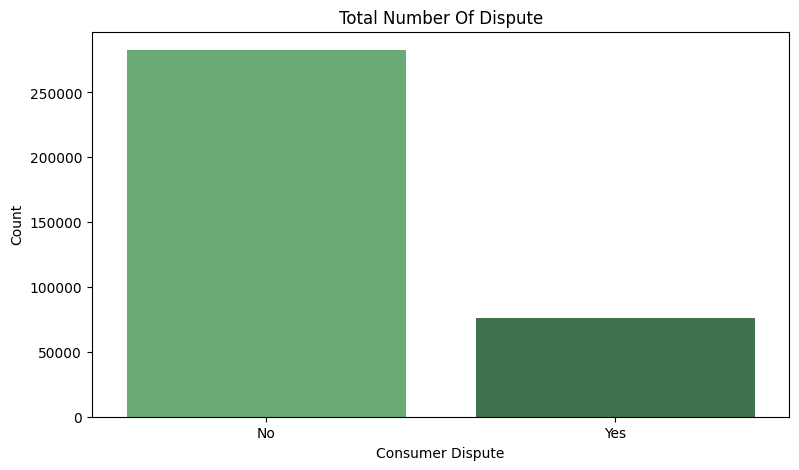

In [47]:
plt.figure(figsize=(9,5))
sns.countplot(x='Consumer disputed?',data=df_tr_new ,palette='Greens_d')
plt.title('Total Number Of Dispute')
plt.xlabel('Consumer Dispute')
plt.ylabel('Count')
plt.show()

In [48]:
#Plot bar graph of thetotal no of disputes products-wise with the help ofseaborn

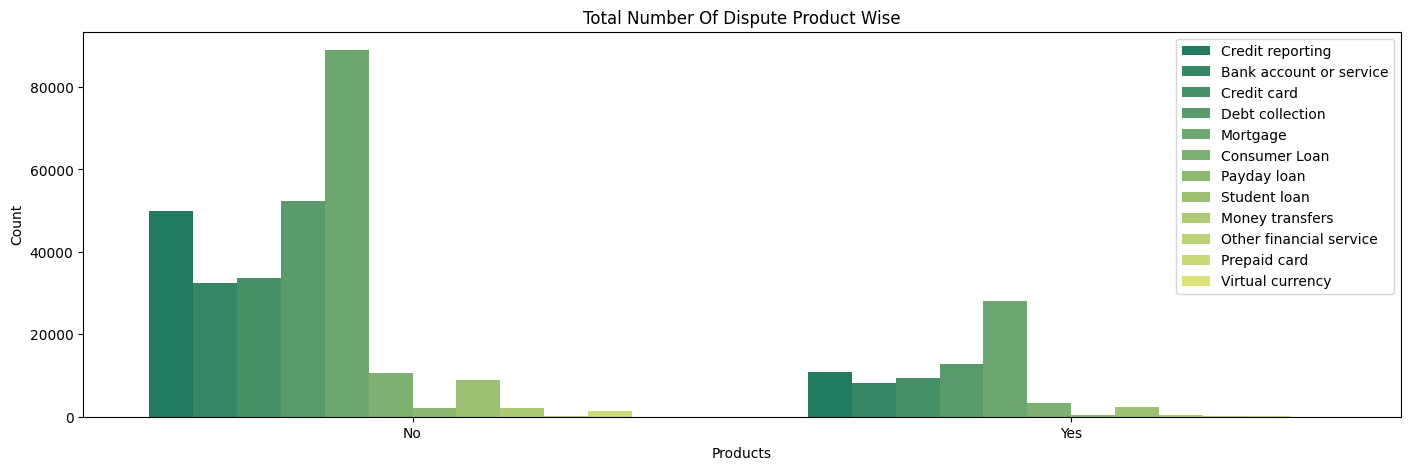

In [49]:
plt.figure(figsize=(17,5))
sns.countplot(x='Consumer disputed?', hue='Product',data=df_tr_new,palette='summer')
plt.title('Total Number Of Dispute Product Wise')
plt.xlabel('Products')
plt.ylabel('Count')
plt.legend()
plt.show()

In [50]:
#Plot bar graph ofthe total no of disputes with Top Issues by Highest Disputes, with the help ofseaborn

<ipython-input-51-913e873037e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Issue',data=df_tr_new,palette='summer')


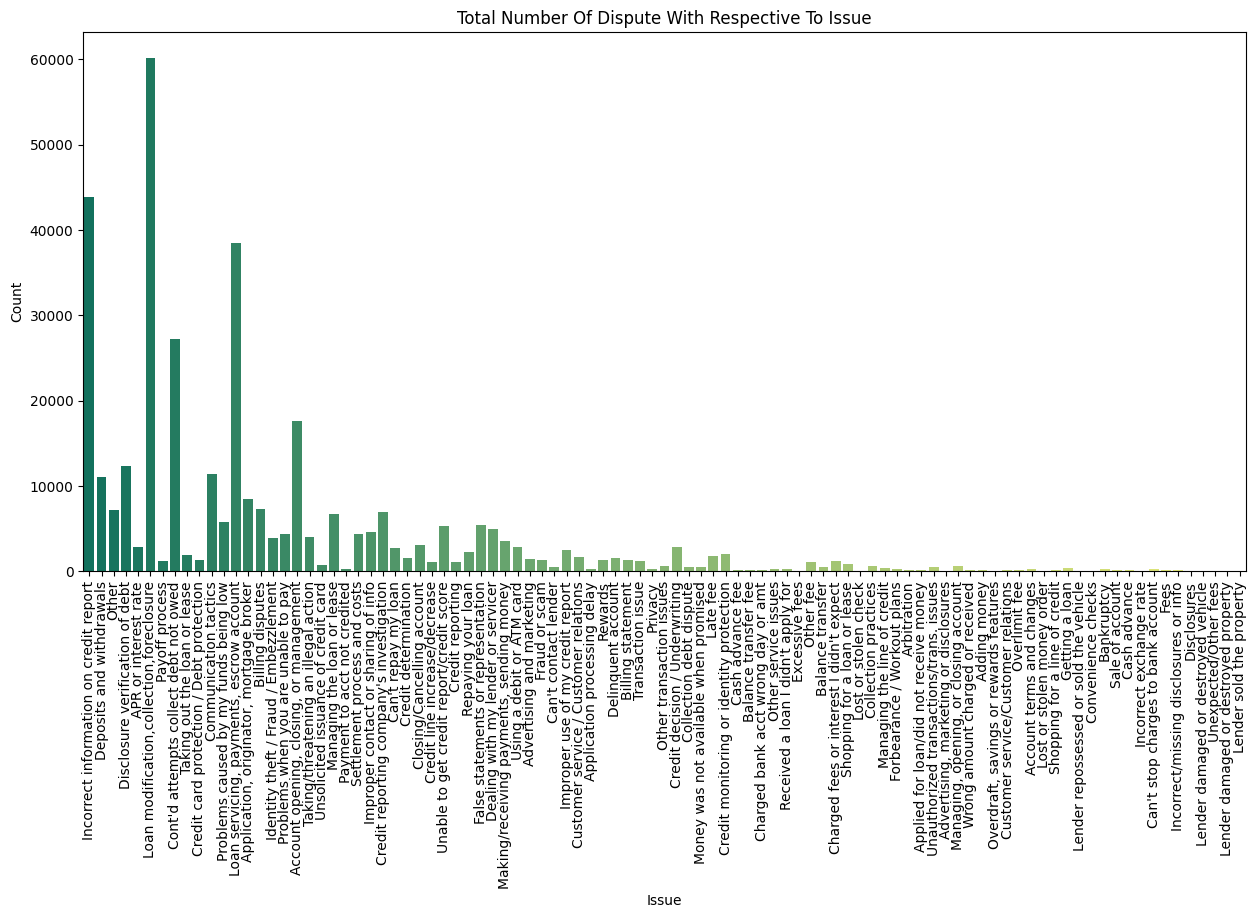

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(x='Issue',data=df_tr_new,palette='summer')
plt.title('Total Number Of Dispute With Respective To Issue')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [52]:
#Plot bar graph ofthe total no of disputes by State with Maximum Disputes

<ipython-input-53-d0047f01acfb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State',data=df_tr_new,palette='summer')


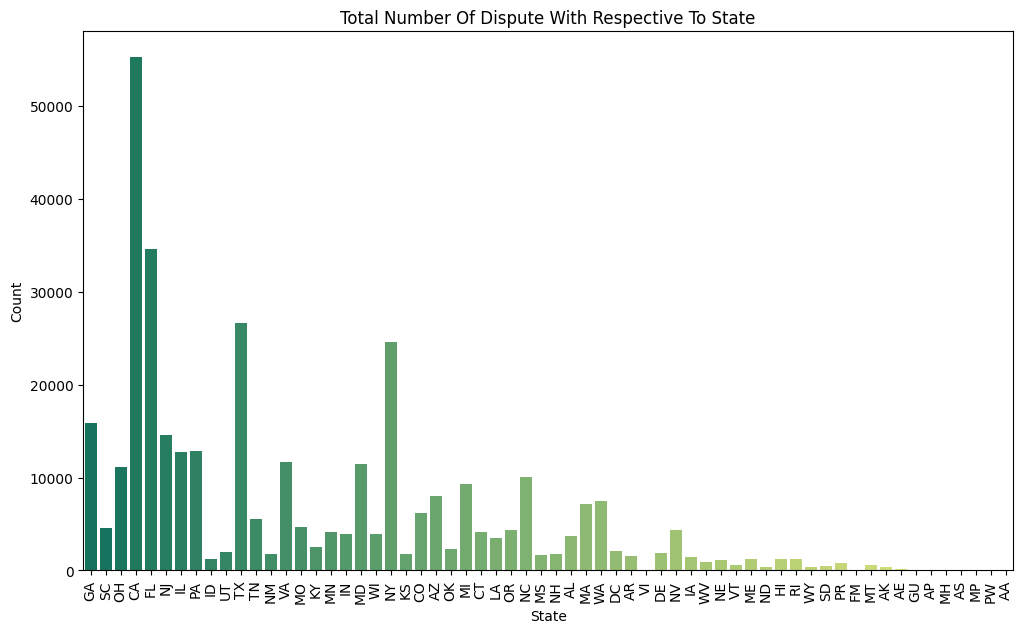

In [53]:
plt.figure(figsize=(12,7))
sns.countplot(x='State',data=df_tr_new,palette='summer')
plt.title('Total Number Of Dispute With Respective To State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [54]:
#Plotbar graph ofthe total no of disputes Submitted Via differentsource

<ipython-input-55-635e2d56c467>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Submitted via',data=df_tr_new,palette='summer')


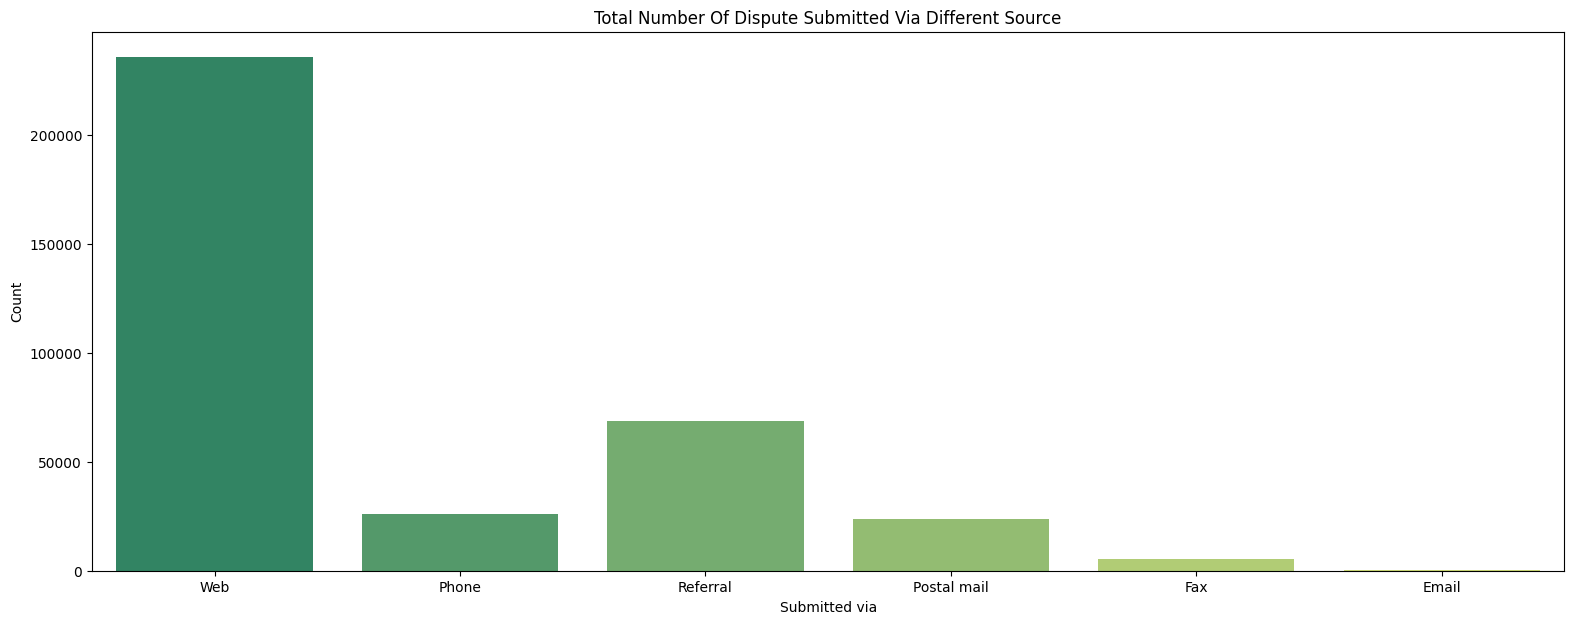

In [55]:
plt.figure(figsize=(19,7))
sns.countplot(x='Submitted via',data=df_tr_new,palette='summer')
plt.title('Total Number Of Dispute Submitted Via Different Source')
plt.ylabel('Count')
plt.show()

In [56]:
#Plot bar graph ofthe total no of disputes where the Company's Response to the Complaints

<ipython-input-57-f24d2cf3996a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Company response to consumer',data=df_tr_new, palette='summer')


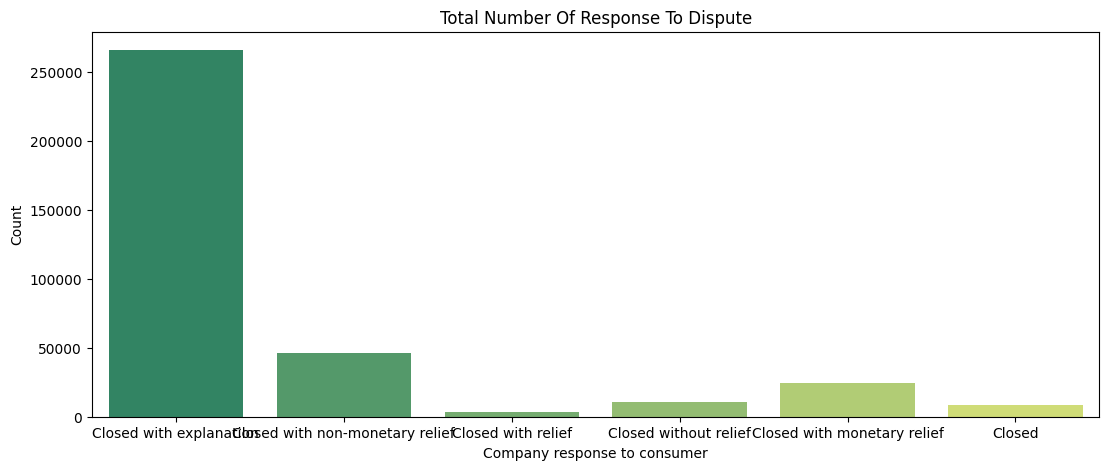

In [57]:
plt.figure(figsize=(13,5))
sns.countplot(x='Company response to consumer',data=df_tr_new, palette='summer')
plt.title('Total Number Of Response To Dispute')
plt.ylabel('Count')
plt.show()

In [58]:
#Plot bar graph ofthe total no of disputes where the Company's Response Leadsto Disputes

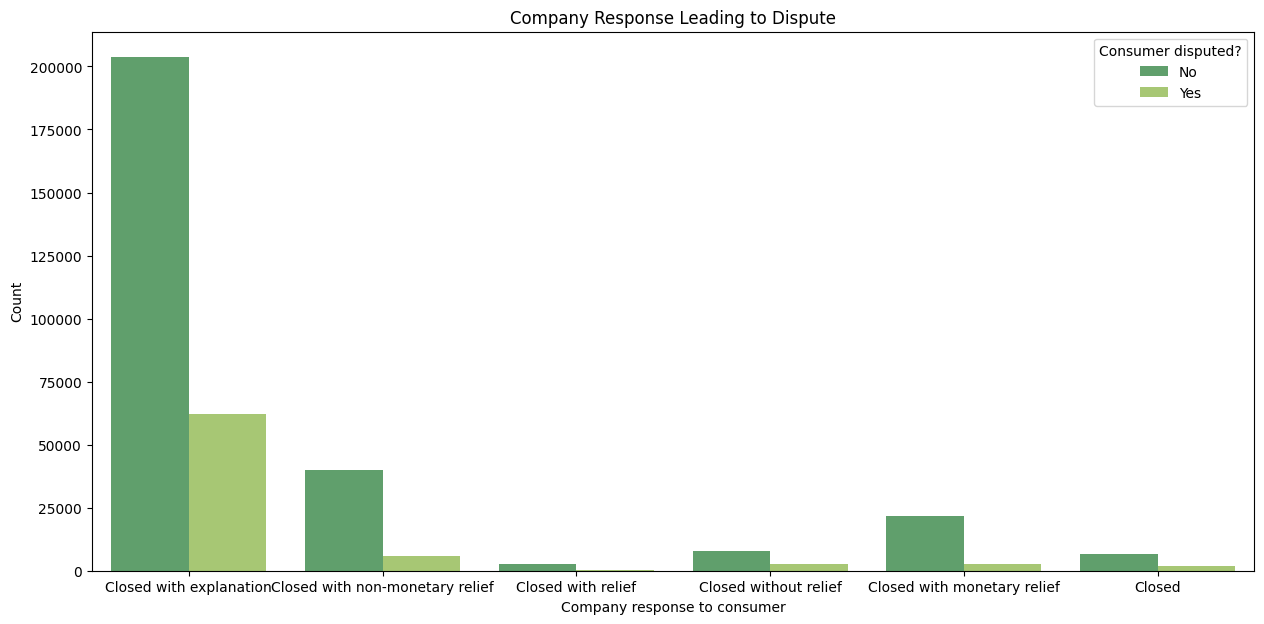

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(x='Company response to consumer', data=df_tr_new, hue='Consumer disputed?',palette='summer')
plt.title('Company Response Leading to Dispute')
plt.ylabel('Count')
plt.show()

In [60]:
#Plot bar graph ofthe total no of disputes.Whether there are Disputes Instead of Timely Response

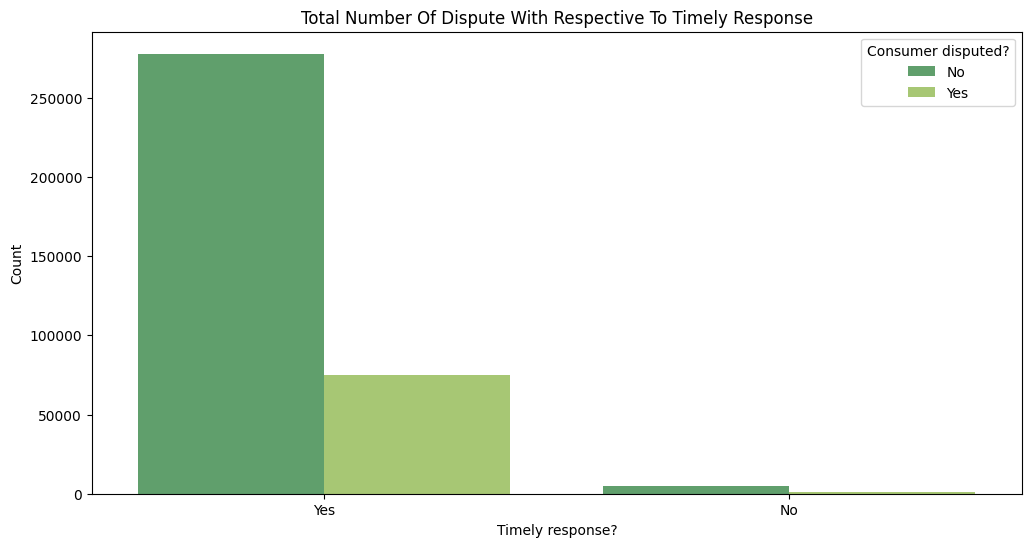

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='Timely response?', data=df_tr_new, hue='Consumer disputed?',palette='summer')
plt.title('Total Number Of Dispute With Respective To Timely Response')
plt.ylabel('Count')
plt.show()

In [62]:
#Plot bar graph ofthe total no of disputes over Year Wise Complaints

<ipython-input-63-87bc01355ba2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df_tr_new,palette='summer')


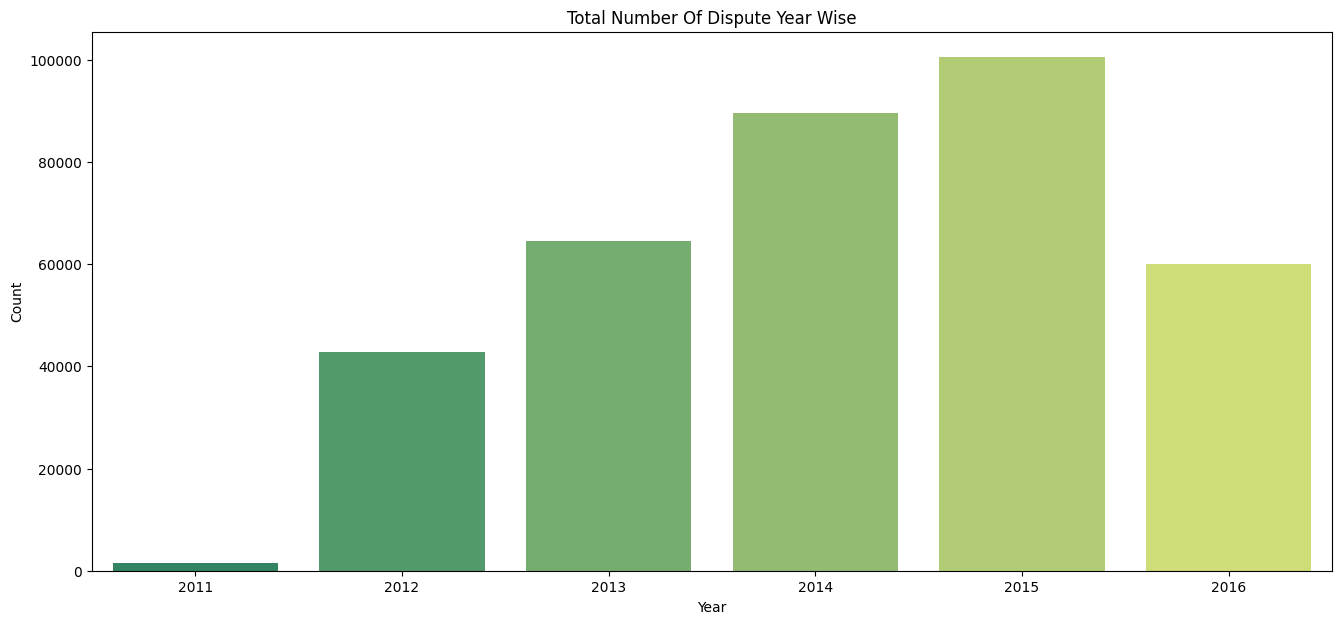

In [63]:
plt.figure(figsize=(16,7))
sns.countplot(x='Year', data=df_tr_new,palette='summer')
plt.title('Total Number Of Dispute Year Wise')
plt.ylabel('Count')
plt.show()

In [64]:
#Plot bar graph ofthe total no of disputes over Year Wise Disputes

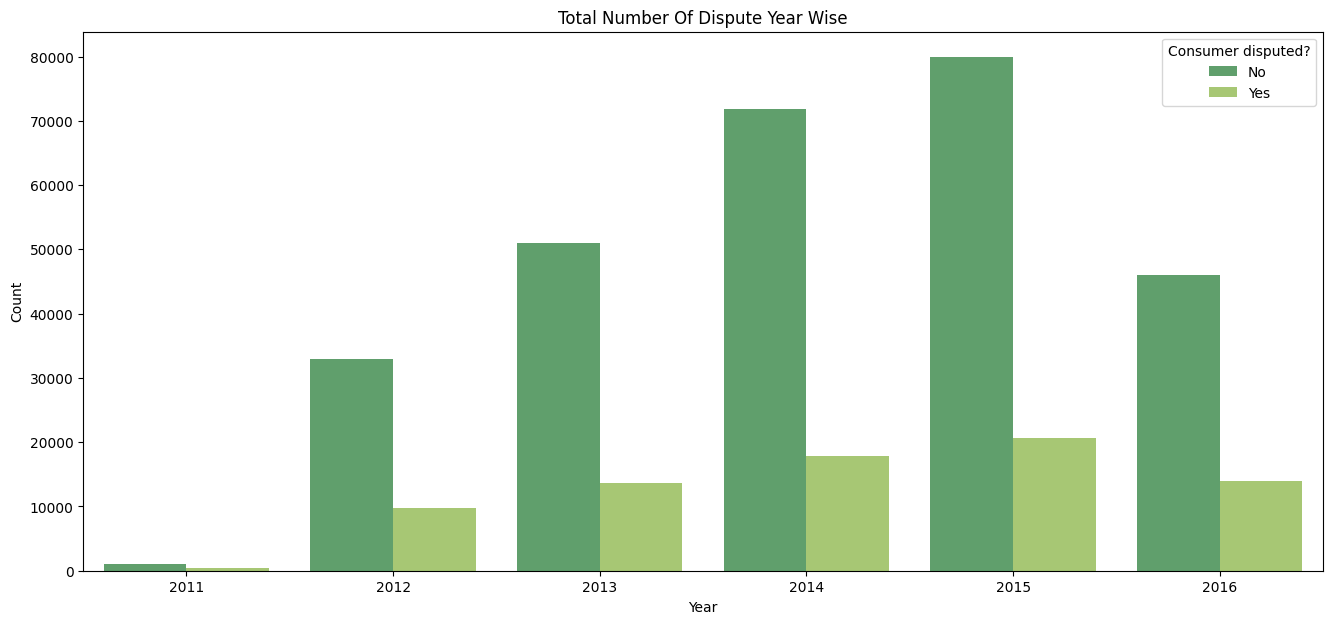

In [65]:
plt.figure(figsize=(16,7))
sns.countplot(x='Year',hue='Consumer disputed?', data=df_tr_new,palette='summer')
plt.title('Total Number Of Dispute Year Wise')
plt.ylabel('Count')
plt.show()

In [66]:
#Plot bar graph ofTop Companies with Highest Complaints

In [67]:
company = df_tr_new['Company'].value_counts()[0:20].index
num_of_complaints = df_tr_new['Company'].value_counts()[0:20].values
company_df = pd.DataFrame({'Company': company, 'Number of complaints': num_of_complaints})
company_df

,Company,Number of complaints
0,Bank of America,34903
1,Wells Fargo & Company,26490
2,JPMorgan Chase & Co.,21677
3,Equifax,21489
4,Experian,20075
5,"TransUnion Intermediate Holdings, Inc.",16881
6,Citibank,16792
7,Ocwen,13110
8,Capital One,10082
9,Nationstar Mortgage,8414


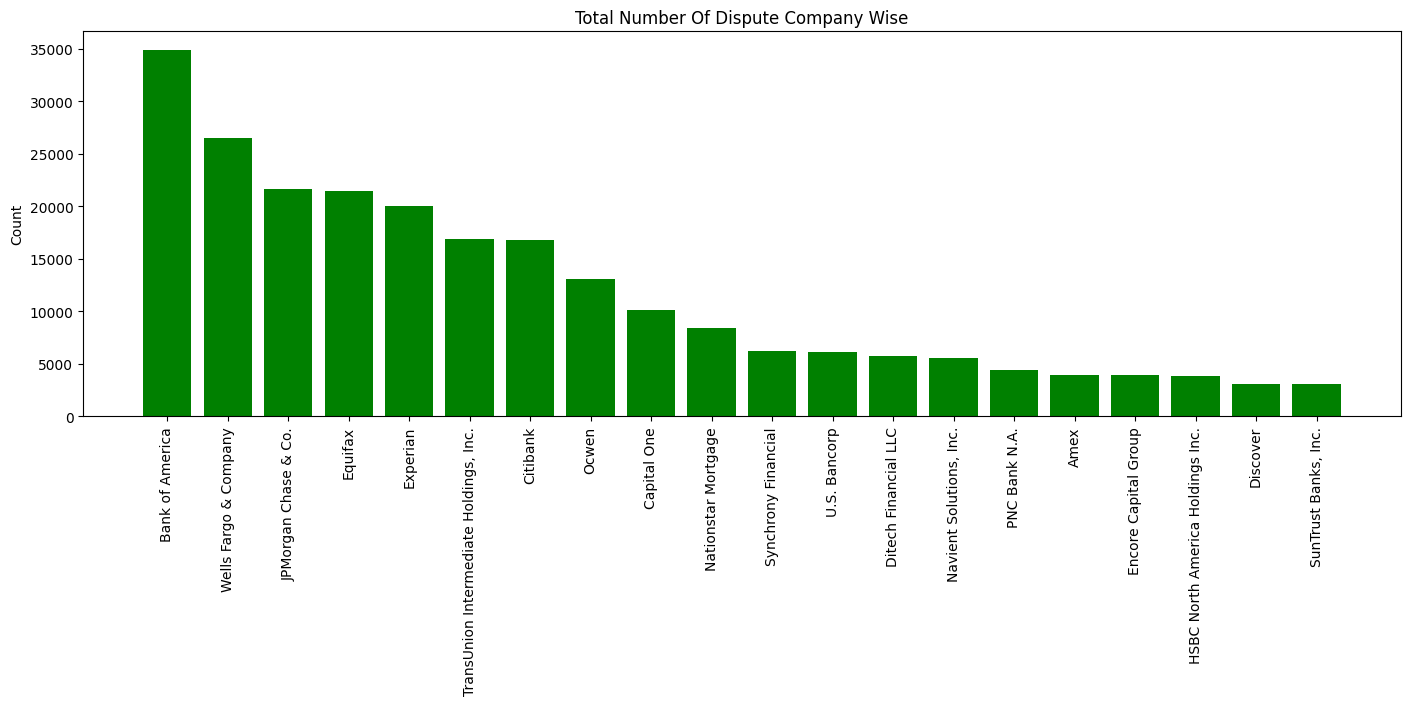

In [68]:
plt.figure(figsize=(17,5))
plt.bar(x='Company',height='Number of complaints',data=company_df,color=['green'])
plt.title('Total Number Of Dispute Company Wise')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [69]:
#Converte all negative days held to zero(it is the time taken by the authority that can't be negative)

In [70]:
df_tr_new['Days_held']=df_tr_new['Days_held'].mask(df_tr_new['Days_held'].lt(0),0)
df_tr_new['Days_held'].describe()

count    358810.000000
mean          4.467863
std          16.738260
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days_held, dtype: float64

In [71]:
df_tt_new['Days_held']=df_tt_new['Days_held'].mask(df_tt_new['Days_held'].lt(0),0)
df_tt_new['Days_held'].describe()

count    119606.000000
mean          4.455178
std          16.229849
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days_held, dtype: float64

In [72]:
#Drop UnnecessaryColumns for the Model Buildinglike:'Company', 'State', 'Year_Received', 'Days_held'

In [73]:
train_data = df_tr_new.drop(['Company', 'State', 'Year', 'Days_held', 'Month', 'Day', 'Week_Received'],axis = 1)
train_data

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,No
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,Yes
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,No
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,No
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Web,Closed with non-monetary relief,Yes,No
358806,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed with non-monetary relief,Yes,No
358807,Credit card,Payoff process,Web,Closed,Yes,Yes
358808,Debt collection,Cont'd attempts collect debt not owed,Phone,Closed with non-monetary relief,Yes,No


In [74]:
test_data = df_tt_new.drop(['Company', 'State', 'Year', 'Days_held', 'Month', 'Day', 'Week_Received'],axis = 1)
test_data

,Product,Issue,Submitted via,Company response to consumer,Timely response?
0,Credit card,Customer service / Customer relations,Web,Closed with monetary relief,Yes
1,Consumer Loan,Payment to acct not credited,Phone,Closed with explanation,Yes
2,Credit card,Credit line increase/decrease,Web,Closed with explanation,Yes
3,Consumer Loan,Problems when you are unable to pay,Web,Closed with non-monetary relief,Yes
4,Debt collection,Improper contact or sharing of info,Web,Closed with explanation,Yes
...,...,...,...,...,...
119601,Credit card,Credit determination,Web,Closed with explanation,Yes
119602,Credit card,Balance transfer,Web,Closed with explanation,Yes
119603,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed without relief,Yes
119604,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes


In [75]:
#Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Consumer disputed?'] = le.fit_transform(train_data['Consumer disputed?'])
train_data

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,0
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,1
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,0
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,0
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,1
...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Web,Closed with non-monetary relief,Yes,0
358806,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed with non-monetary relief,Yes,0
358807,Credit card,Payoff process,Web,Closed,Yes,1
358808,Debt collection,Cont'd attempts collect debt not owed,Phone,Closed with non-monetary relief,Yes,0


In [77]:
train_data['Consumer disputed?'].value_counts()

Consumer disputed?
0    282638
1     76172
Name: count, dtype: int64

In [78]:
#Create Dummy Variables for categoricalfeaturesand concat with the original data framelike: 'Product,’'Submitted via,’'Company response to consumer,’'Timely response?'

In [79]:
dummies= pd.get_dummies(train_data[['Product','Submitted via','Company response to consumer', 'Timely response?']])
dummies

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,False,False,False,True,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
358806,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,True
358807,False,False,True,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
358808,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [80]:
dummies.replace({False: 0, True: 1}, inplace=True)

In [81]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count   Dtype
---  ------                                                        --------------   -----
 0   Product_Bank account or service                               358810 non-null  int64
 1   Product_Consumer Loan                                         358810 non-null  int64
 2   Product_Credit card                                           358810 non-null  int64
 3   Product_Credit reporting                                      358810 non-null  int64
 4   Product_Debt collection                                       358810 non-null  int64
 5   Product_Money transfers                                       358810 non-null  int64
 6   Product_Mortgage                                              358810 non-null  int64
 7   Product_Other financial service                               358810 non-n

In [82]:
train_data = train_data.drop(['Issue','Product','Submitted via','Company response to consumer',
                                   'Timely response?'],axis = 1)

train_data = train_data.join(dummies)
train_data

,Consumer disputed?,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
358806,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
358807,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
358808,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [83]:
dummies1= pd.get_dummies(test_data[['Product','Submitted via','Company response to consumer',
                                   'Timely response?']])
dummies.replace({False: 0, True: 1}, inplace=True)
test_data = test_data.drop(['Issue', 'Product','Submitted via','Company response to consumer',
                                   'Timely response?'],axis = 1)
test_data = test_data.join(dummies1)
test_data

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,False,False,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,False,False,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
119602,False,False,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
119603,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,True
119604,False,False,False,True,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [84]:
#discarding the  dependent variable before doing standardization
target = train_data['Consumer disputed?']
train_data = train_data.drop('Consumer disputed?',axis=1)

In [85]:
#Scaling the Data Sets (note:discard dependent variable before doing standardization)and Makefeature Selection with the help ofPCAup to 80% of the information.

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(train_data)

scaled_data_train = pd.DataFrame(scaled_data_train, columns = train_data.columns)
scaled_data_train

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,-0.357528,-0.20123,-0.369551,2.216739,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,-0.485533,0.723778,-0.156407,0.591974,-0.271985,-0.383883,-0.093929,-0.174509,-0.131892,0.131892
1,2.796985,-0.20123,-0.369551,-0.451113,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,-0.485533,0.723778,-0.156407,0.591974,-0.271985,-0.383883,-0.093929,-0.174509,-0.131892,0.131892
2,-0.357528,-0.20123,2.705985,-0.451113,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,-0.485533,-1.381638,-0.156407,-1.689264,-0.271985,2.604963,-0.093929,-0.174509,-0.131892,0.131892
3,-0.357528,-0.20123,-0.369551,-0.451113,2.125406,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,2.059594,-1.381638,-0.156407,0.591974,-0.271985,-0.383883,-0.093929,-0.174509,-0.131892,0.131892
4,-0.357528,-0.20123,-0.369551,-0.451113,2.125406,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,-0.485533,0.723778,-0.156407,0.591974,-0.271985,-0.383883,-0.093929,-0.174509,-0.131892,0.131892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,-0.357528,-0.20123,-0.369551,2.216739,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,-0.485533,0.723778,-0.156407,-1.689264,-0.271985,2.604963,-0.093929,-0.174509,-0.131892,0.131892
358806,-0.357528,-0.20123,-0.369551,-0.451113,-0.470498,-0.083797,1.437019,-0.032774,-0.082489,-0.068402,...,2.059594,-1.381638,-0.156407,-1.689264,-0.271985,2.604963,-0.093929,-0.174509,-0.131892,0.131892
358807,-0.357528,-0.20123,2.705985,-0.451113,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,-0.485533,0.723778,6.393584,-1.689264,-0.271985,-0.383883,-0.093929,-0.174509,-0.131892,0.131892
358808,-0.357528,-0.20123,-0.369551,-0.451113,2.125406,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,-0.485533,-1.381638,-0.156407,-1.689264,-0.271985,2.604963,-0.093929,-0.174509,-0.131892,0.131892


In [87]:
scaled_data_test = scaler.fit_transform(test_data)

scaled_data_test = pd.DataFrame(scaled_data_test, columns = test_data.columns)
scaled_data_test

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,-0.3602,-0.200785,2.719731,-0.453990,-0.468281,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.486634,0.724262,-0.154714,-1.690675,3.683522,-0.384513,-0.093928,-0.174668,-0.130672,0.130672
1,-0.3602,4.980458,-0.367683,-0.453990,-0.468281,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.486634,-1.380715,-0.154714,0.591480,-0.271479,-0.384513,-0.093928,-0.174668,-0.130672,0.130672
2,-0.3602,-0.200785,2.719731,-0.453990,-0.468281,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.486634,0.724262,-0.154714,0.591480,-0.271479,-0.384513,-0.093928,-0.174668,-0.130672,0.130672
3,-0.3602,4.980458,-0.367683,-0.453990,-0.468281,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.486634,0.724262,-0.154714,-1.690675,-0.271479,2.600692,-0.093928,-0.174668,-0.130672,0.130672
4,-0.3602,-0.200785,-0.367683,-0.453990,2.135468,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.486634,0.724262,-0.154714,0.591480,-0.271479,-0.384513,-0.093928,-0.174668,-0.130672,0.130672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,-0.3602,-0.200785,2.719731,-0.453990,-0.468281,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.486634,0.724262,-0.154714,0.591480,-0.271479,-0.384513,-0.093928,-0.174668,-0.130672,0.130672
119602,-0.3602,-0.200785,2.719731,-0.453990,-0.468281,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.486634,0.724262,-0.154714,0.591480,-0.271479,-0.384513,-0.093928,-0.174668,-0.130672,0.130672
119603,-0.3602,-0.200785,-0.367683,-0.453990,-0.468281,-0.084452,1.434696,-0.031954,-0.081749,-0.068278,...,2.054931,-1.380715,-0.154714,-1.690675,-0.271479,-0.384513,-0.093928,5.725161,-0.130672,0.130672
119604,-0.3602,-0.200785,-0.367683,2.202692,-0.468281,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.486634,0.724262,-0.154714,0.591480,-0.271479,-0.384513,-0.093928,-0.174668,-0.130672,0.130672


In [88]:
#Makefeature Selection with the help ofPCAup to 80% of the information.

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
pca_data_train = pca.fit_transform(scaled_data_train)
pca_train_df = pd.DataFrame(pca_data_train)
pca_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.745389,-1.054155,-1.011444,0.805423,-0.395950,0.951959,-0.664532,0.096289,-0.086436,-0.126461,-0.229402,0.133862,-0.344617,-0.015873,0.006935,0.102833,-0.257457
1,-0.102020,-0.115782,-0.251352,-1.144141,-1.063609,-0.052904,-1.772486,-0.063366,-0.305342,-0.247746,-0.128895,0.412225,-0.233928,0.120406,0.027209,0.042353,-0.376594
2,-0.544823,-0.935824,2.875778,0.184375,-1.113688,-0.419747,3.106987,1.060927,-0.918127,-0.178789,-0.849018,-0.241782,-0.144570,-0.153417,-0.050033,-0.032209,1.128317
3,-0.743775,1.078868,-0.275320,0.161970,-0.751390,-1.446446,-0.044808,-1.785566,-0.487396,-0.051789,-0.285649,-0.831326,0.217863,-0.052236,-0.041065,-0.039347,0.313791
4,1.203131,-0.316467,-1.115128,-0.664420,-0.436753,-1.228631,0.325699,-1.039820,-0.058567,-0.197660,-0.066577,-0.373755,0.195195,0.087437,-0.003010,0.003293,0.019433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,1.277491,-2.470963,1.388407,2.214203,0.337821,0.069406,-0.613995,0.544655,-0.376401,-0.024340,-0.793600,0.014333,-0.334697,-0.110821,-0.010641,0.180493,0.066353
358806,-1.477060,0.241802,1.924121,2.035743,1.588223,-1.043131,-0.380948,0.000143,-0.294389,0.130107,-0.905918,-0.565335,-0.204875,-0.172963,-0.044395,0.164016,0.393858
358807,0.913401,-0.753784,2.143242,-1.208211,1.200164,-1.379953,1.184940,-1.278462,1.881074,0.983958,2.762617,2.056133,-0.347031,-0.222472,0.182779,-0.444313,-1.345167
358808,0.311807,-0.620458,2.062574,0.954526,-1.735740,-3.122623,2.240554,0.940520,-1.026144,-0.341094,-0.846021,-0.537294,0.039965,0.000996,-0.048938,0.117942,1.211409


In [90]:
pca_train_df['Consumer disputed?'] = target
pca_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Consumer disputed?
0,0.745389,-1.054155,-1.011444,0.805423,-0.395950,0.951959,-0.664532,0.096289,-0.086436,-0.126461,-0.229402,0.133862,-0.344617,-0.015873,0.006935,0.102833,-0.257457,0
1,-0.102020,-0.115782,-0.251352,-1.144141,-1.063609,-0.052904,-1.772486,-0.063366,-0.305342,-0.247746,-0.128895,0.412225,-0.233928,0.120406,0.027209,0.042353,-0.376594,1
2,-0.544823,-0.935824,2.875778,0.184375,-1.113688,-0.419747,3.106987,1.060927,-0.918127,-0.178789,-0.849018,-0.241782,-0.144570,-0.153417,-0.050033,-0.032209,1.128317,0
3,-0.743775,1.078868,-0.275320,0.161970,-0.751390,-1.446446,-0.044808,-1.785566,-0.487396,-0.051789,-0.285649,-0.831326,0.217863,-0.052236,-0.041065,-0.039347,0.313791,0
4,1.203131,-0.316467,-1.115128,-0.664420,-0.436753,-1.228631,0.325699,-1.039820,-0.058567,-0.197660,-0.066577,-0.373755,0.195195,0.087437,-0.003010,0.003293,0.019433,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,1.277491,-2.470963,1.388407,2.214203,0.337821,0.069406,-0.613995,0.544655,-0.376401,-0.024340,-0.793600,0.014333,-0.334697,-0.110821,-0.010641,0.180493,0.066353,0
358806,-1.477060,0.241802,1.924121,2.035743,1.588223,-1.043131,-0.380948,0.000143,-0.294389,0.130107,-0.905918,-0.565335,-0.204875,-0.172963,-0.044395,0.164016,0.393858,0
358807,0.913401,-0.753784,2.143242,-1.208211,1.200164,-1.379953,1.184940,-1.278462,1.881074,0.983958,2.762617,2.056133,-0.347031,-0.222472,0.182779,-0.444313,-1.345167,1
358808,0.311807,-0.620458,2.062574,0.954526,-1.735740,-3.122623,2.240554,0.940520,-1.026144,-0.341094,-0.846021,-0.537294,0.039965,0.000996,-0.048938,0.117942,1.211409,0


In [91]:
#Splittingthe Data Sets Into X and Y by the dependent and independent variables (data selected by PCA)

In [92]:
X= pca_train_df.drop('Consumer disputed?',axis=1)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.745389,-1.054155,-1.011444,0.805423,-0.395950,0.951959,-0.664532,0.096289,-0.086436,-0.126461,-0.229402,0.133862,-0.344617,-0.015873,0.006935,0.102833,-0.257457
1,-0.102020,-0.115782,-0.251352,-1.144141,-1.063609,-0.052904,-1.772486,-0.063366,-0.305342,-0.247746,-0.128895,0.412225,-0.233928,0.120406,0.027209,0.042353,-0.376594
2,-0.544823,-0.935824,2.875778,0.184375,-1.113688,-0.419747,3.106987,1.060927,-0.918127,-0.178789,-0.849018,-0.241782,-0.144570,-0.153417,-0.050033,-0.032209,1.128317
3,-0.743775,1.078868,-0.275320,0.161970,-0.751390,-1.446446,-0.044808,-1.785566,-0.487396,-0.051789,-0.285649,-0.831326,0.217863,-0.052236,-0.041065,-0.039347,0.313791
4,1.203131,-0.316467,-1.115128,-0.664420,-0.436753,-1.228631,0.325699,-1.039820,-0.058567,-0.197660,-0.066577,-0.373755,0.195195,0.087437,-0.003010,0.003293,0.019433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,1.277491,-2.470963,1.388407,2.214203,0.337821,0.069406,-0.613995,0.544655,-0.376401,-0.024340,-0.793600,0.014333,-0.334697,-0.110821,-0.010641,0.180493,0.066353
358806,-1.477060,0.241802,1.924121,2.035743,1.588223,-1.043131,-0.380948,0.000143,-0.294389,0.130107,-0.905918,-0.565335,-0.204875,-0.172963,-0.044395,0.164016,0.393858
358807,0.913401,-0.753784,2.143242,-1.208211,1.200164,-1.379953,1.184940,-1.278462,1.881074,0.983958,2.762617,2.056133,-0.347031,-0.222472,0.182779,-0.444313,-1.345167
358808,0.311807,-0.620458,2.062574,0.954526,-1.735740,-3.122623,2.240554,0.940520,-1.026144,-0.341094,-0.846021,-0.537294,0.039965,0.000996,-0.048938,0.117942,1.211409


In [93]:
y = pca_train_df['Consumer disputed?']
y

0         0
1         1
2         0
3         0
4         1
         ..
358805    0
358806    0
358807    1
358808    0
358809    0
Name: Consumer disputed?, Length: 358810, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
#Build given models and measure their test and validation accuracy:

In [96]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log = LogisticRegression()
log.fit(X_train, y_train)
log_predict = log.predict(X_test)
Log_accuracy = accuracy_score(log_predict, y_test)
Log_accuracy

0.7876174019676152

In [97]:
print(classification_report(y_test,log_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



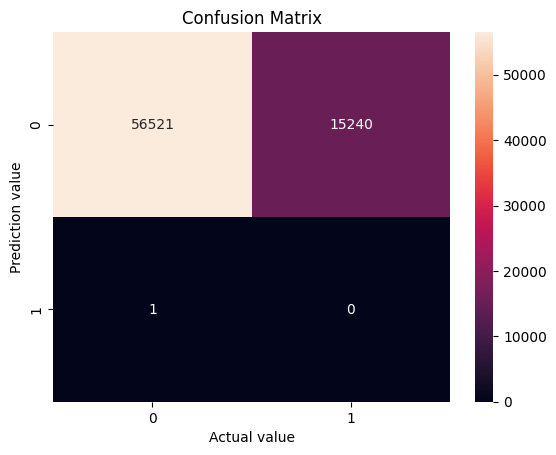

In [98]:
CM = confusion_matrix(log_predict, y_test)
sns.heatmap(CM, annot=True,fmt='g')
plt.ylabel('Prediction value')
plt.xlabel('Actual value')
plt.title('Confusion Matrix')
plt.show()

In [99]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier()
clf_model = clf_model.fit(X_train,y_train)
clf_predict = clf_model.predict(X_test)
DT_accuracy = accuracy_score(clf_predict, y_test)
DT_accuracy

0.7875059223544494

In [100]:
print(classification_report(y_test,clf_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



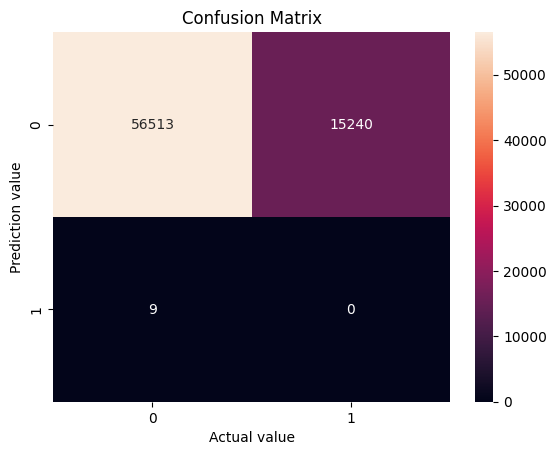

In [101]:
CM = confusion_matrix(clf_predict, y_test)
sns.heatmap(CM, annot=True,fmt='g')
plt.ylabel('Prediction value')
plt.xlabel('Actual value')
plt.title('Confusion Matrix')
plt.show()

In [102]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=7, criterion='entropy')
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
RF_accuracy = accuracy_score(rf_predict, y_test)
RF_accuracy

0.7874641174995123

In [103]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



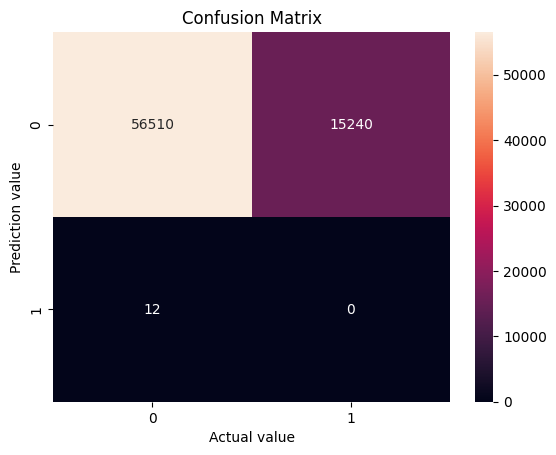

In [104]:
CM = confusion_matrix(rf_predict, y_test)
sns.heatmap(CM, annot=True,fmt='g')
plt.ylabel('Prediction value')
plt.xlabel('Actual value')
plt.title('Confusion Matrix')
plt.show()

In [105]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)
ada_predict = ada.predict(X_test)
Ada_accuracy = accuracy_score(y_test, ada_predict)
Ada_accuracy

0.7876174019676152

In [106]:
print(classification_report(y_test,ada_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



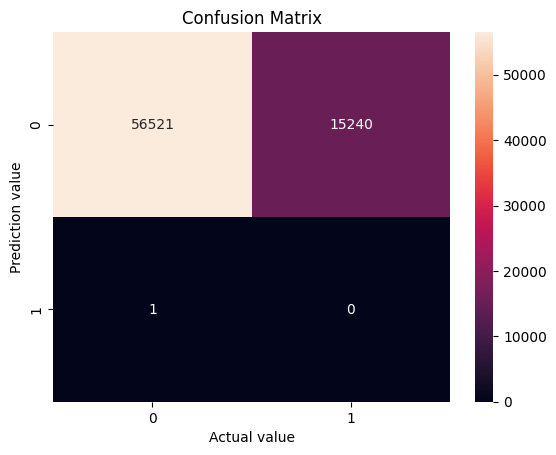

In [107]:
CM = confusion_matrix(ada_predict, y_test)
sns.heatmap(CM, annot=True,fmt='g')
plt.ylabel('Prediction value')
plt.xlabel('Actual value')
plt.title('Confusion Matrix')
plt.show()

In [108]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
Gbc_accuracy = accuracy_score(y_test, gbc_predict)
Gbc_accuracy

0.787575597112678

In [109]:
print(classification_report(y_test,gbc_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



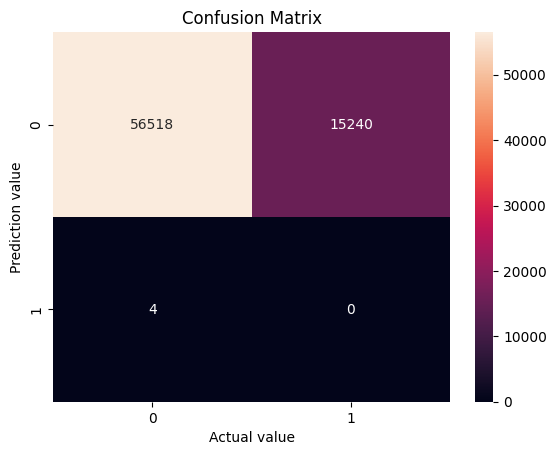

In [110]:
CM = confusion_matrix(gbc_predict, y_test)
sns.heatmap(CM, annot=True,fmt='g')
plt.ylabel('Prediction value')
plt.xlabel('Actual value')
plt.title('Confusion Matrix')
plt.show()

In [111]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
KNN_accuracy = accuracy_score(knn_predict, y_test)
KNN_accuracy

0.7137064184387281

In [112]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82     56522
           1       0.27      0.20      0.23     15240

    accuracy                           0.71     71762
   macro avg       0.53      0.53      0.53     71762
weighted avg       0.69      0.71      0.70     71762



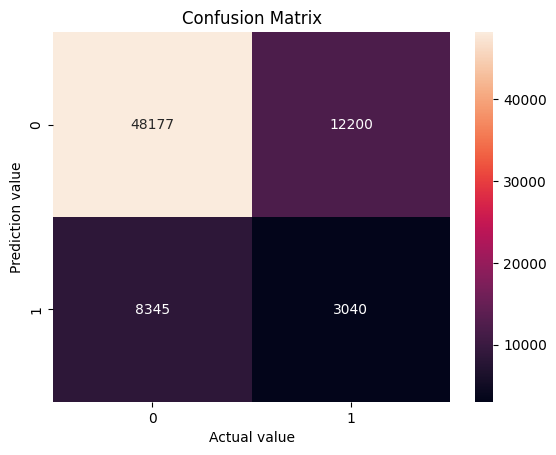

In [113]:
CM = confusion_matrix(knn_predict, y_test)
sns.heatmap(CM, annot=True,fmt='g')
plt.ylabel('Prediction value')
plt.xlabel('Actual value')
plt.title('Confusion Matrix')
plt.show()

In [114]:
#!pip install xgboost

In [115]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50)
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
Xgb_accuracy = accuracy_score(y_test, xgb_predict)
Xgb_accuracy

0.7875059223544494

In [116]:
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



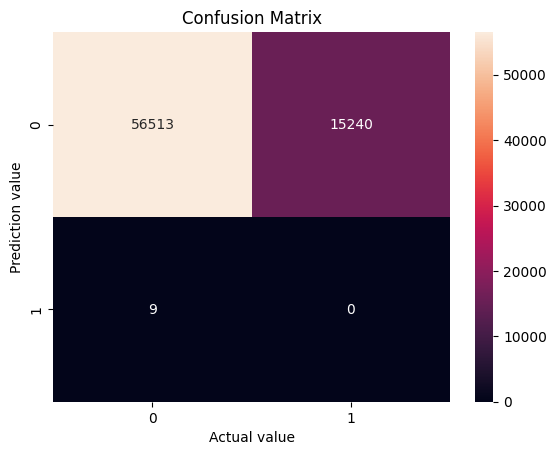

In [117]:
CM = confusion_matrix(xgb_predict, y_test)
sns.heatmap(CM, annot=True,fmt='g')
plt.ylabel('Prediction value')
plt.xlabel('Actual value')
plt.title('Confusion Matrix')
plt.show()

In [118]:
#Whoever gives the most accurate result uses it and predicts the outcomefor the test file and fills its dispute column so the business team can take some action accordingly.

In [119]:
final_model_rf=RandomForestClassifier(n_estimators=7,criterion='entropy')

final_model_rf.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=7)

In [121]:
prediction = final_model_rf.predict(X)

In [122]:
RF_accuracy_score = accuracy_score(prediction, y)
RF_accuracy_score

0.7877316685711101

In [123]:
pca = PCA(n_components=0.8)
pca_data_test = pca.fit_transform(scaled_data_test)
pca_test_df = pd.DataFrame(pca_data_test)
pca_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.108742,-1.445923,2.658048,-2.716118,0.455880,1.862815,0.551553,-0.551403,-1.372776,0.013356,0.195496,-0.407041,0.074099,0.160751,0.048245,-0.659601,-0.311944
1,-0.790860,0.731049,-0.460758,-0.830418,-2.428420,-0.663979,1.854500,2.942524,1.529123,3.695760,-1.078854,-0.436532,0.501036,-0.991043,-0.152983,0.079589,1.152243
2,0.375637,-0.624727,-0.279769,-1.435676,0.209345,1.470888,1.103898,-1.022536,-0.091332,-0.018718,-0.113949,-0.058200,-0.004153,0.072587,0.012483,-0.119751,-0.124836
3,1.094059,-1.769458,1.319364,0.414271,0.286714,-0.502202,-0.013762,2.127737,1.299269,4.013214,-1.426802,-0.425735,0.589931,-1.116718,-0.115108,-0.140702,0.701108
4,1.220469,-0.362524,-1.072487,-0.665905,-0.414926,-1.237746,0.186888,-1.084693,0.042840,-0.137572,-0.051853,-0.434674,0.215822,0.313076,0.010794,0.107705,-0.123657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,0.375637,-0.624727,-0.279769,-1.435676,0.209345,1.470888,1.103898,-1.022536,-0.091332,-0.018718,-0.113949,-0.058200,-0.004153,0.072587,0.012483,-0.119751,-0.124836
119602,0.375637,-0.624727,-0.279769,-1.435676,0.209345,1.470888,1.103898,-1.022536,-0.091332,-0.018718,-0.113949,-0.058200,-0.004153,0.072587,0.012483,-0.119751,-0.124836
119603,-2.495621,1.534431,1.988317,0.851168,3.430638,-0.505756,0.806285,0.782444,1.468708,-0.297969,0.972420,-0.826494,0.239950,0.641145,-0.003767,0.022639,0.116495
119604,0.769099,-1.080136,-0.968864,0.803044,-0.393839,0.963809,-0.601578,0.189690,0.120140,-0.128114,-0.149774,0.165089,-0.317814,0.113158,0.043912,-0.038052,-0.458356


In [124]:
pca_test_df['predict_rf_test'] = final_model_rf.predict(pca_test_df)

In [126]:
final_prediction = pd.DataFrame(pca_test_df['predict_rf_test'])
final_prediction

,predict_rf_test
0,0
1,0
2,0
3,0
4,0
...,...
119601,0
119602,0
119603,0
119604,0
